#*Please **make a copy** before starting!*

Check in here: https://members.acmucsd.com/checkin?code=vision

# Interactive Notebook: Intro to CV Workshop 1: Getting Started with Computer Vision

**Note:** This notebook is meant to be used in conjunction with the slides, which give additional information about different topics.

Please see the slides available in our GitHub repo here: https://github.com/acmucsd/acm-ai-workshops/tree/main/2023/SP23/intro-cv-series/workshop-1

Conventions used:

📖 - Defintion <br />
❗ - Important <br />
❓ - Question

## Section 1 - Overview of Computer Vision


### 1.1 Introduction of Computer Vision


Computer Vision is the process of making images or video readable and processable by a model with some output (e.g. finding an apple in an image, detecting threats in cars, etc).

Below, we will build some knowledge until we know enough to build a simple classification model.

 ### 1.2 The MNIST Dataset

First, we load our dataset. The MNIST dataset is a popular dataset of black-and-white, handwritten numbers.

We wish to classify these numbers from 0-9.

Import packages:

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

Download dataset:

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Visualize some images from our MNIST dataset:

Label: 5


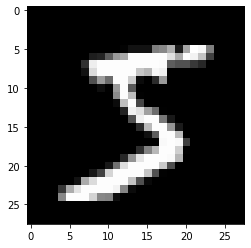

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 8


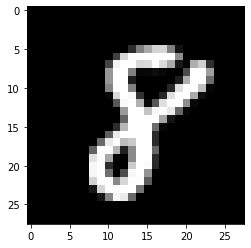

In [ ]:
image, label = dataset[761]
plt.imshow(image, cmap='gray')
print('Label:', label)


❗ Each record in the MNIST dataset consists of 2 parts: 
- An **image** of a handwritten number 
- A **label** indicating the correct number appears in the image


## Section 2 -  Formulating a Machine Learning problem 

### 2.1 What does a general (supervised) machine learning problem look like?
Machine learning can be applied to a host of different problems and situations, and models can be designed and trained to function as anything from a decision making machine to an intelligent chat bot. All of these revolve around taking in some input and outputting a desired answer.

The most fundamental or classical machine learning problems can usually be categorized as either classification problems, or regression problems.

📖  Definition: **Classification**
> Classification problems are when we are given data points, and we have to predict a label for them. For example, a classic problem is given an email, we want to predict whether it's spam or not.

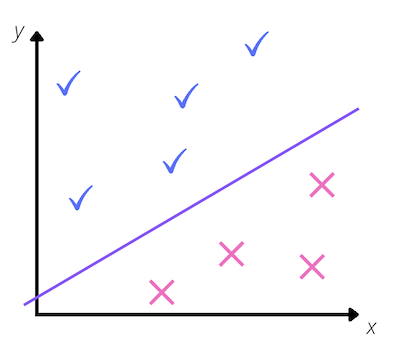

📖  Definition: **Regression**
> Regression problems usually involve predicting some continuous value, meaning a number. For example, given the face shot of a person, we want to predict their age.

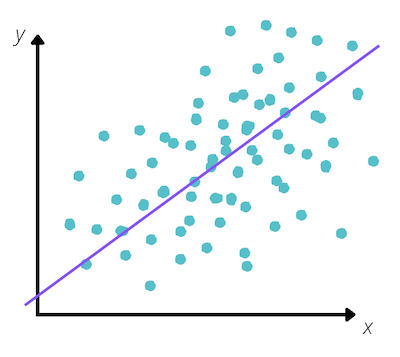

❓ Describe our MNIST problem - which type of Machine Learning problem is it?

In [ ]:
Answer = "" #@param ["", "Regression", "Classification"]


### 2.2 Designing a loss function
So now that we've established the basics of our problem, how do we decide when an output is good and when an output is bad? We need ways to express whether an answer is good or bad in a mathematical way.

📖  Definition: **Loss Function**
> Loss function measures how wrong your models predictionsare compared to the truth labels. Lower the better.

Some common loss functions: 


<img src= "https://i.imgur.com/7FAJ5TD.png" width=600>

Pytorch has many built-in loss function in `torch.nn` and `torch.nn.functional`. You can read more about them here:
- https://pytorch.org/docs/stable/nn.html#loss-functions
- https://pytorch.org/docs/stable/nn.functional.html


❓ What loss function(s) would be approriate for the MNIST problem?  

In [ ]:
Answer = "" #@param {type:"string"}


### 2.3 Gradient Descent - Adjusting answer to be correct

Gradient Descent is an optimization algorithm used for minimizing the cost function in various machine learning algorithms


<img src="https://i.imgur.com/AAFjiMa.png" width=400>

To implement Gradient Descent, here are all the steps you need to follow: 
```
1. Generate predictions

2. Calculate the loss using a loss function

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero
```


### 2.4 Neural Networks

<img src="https://i.imgur.com/UcfKllX.png" width=400>

❓ Let's start making a neural network with 1 hidden layer. Fill in the blank to complete a general architecture of our MNIST classification neural network 

<img src="https://i.imgur.com/XMRNarE.png" width=500>

In [ ]:
input_layer_features = 0 #@param {type:"integer"}
hidden_layer_size = 1 #@param {type:"integer"}
output_layer_size = 0 #@param {type:"integer"}
hidden_layer_activation = "" #@param {type:"string"}
loss_function = "" #@param {type:"string"}
optimizer = "" #@param {type:"string"}






## Section 3 - Pytorch and Training Basics

### 3.1 Pytorch Basics

#### Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

> Example: We can represent an image as a tensor with shape $[3, 224, 224]$ which would mean $[color -channels, height, width]$

<img src="https://i.imgur.com/nvC8Y55.png" width=800>

In [ ]:
# Number 
t1 = torch.tensor(4.)

print(t1.ndim) # dimensions of a tensor
print (t1.shape) # shape of a tensor
print(t1.item()) # retrieve the number within a tensor (one-element tensor only)

In [ ]:
# Vector 
vector = torch.tensor([1,3,5]) 

# Matrix
matrix = [[5., 6], [7, 8], [9, 10]]
t3 = torch.tensor(matrix) 

In [ ]:
# Tensor
tensor = torch.rand(3, 2, 3)

# Find out details about the tensor
print(tensor)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}") # will default to CPU

#### Tensors operations and functions

Basic operations in includes:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
t = torch.tensor([1, 2, 3, 5])
print("Add 10:", t + 10)
print("Subtract tensor([ 1,  2,  3, 4]):", torch.sub(t, torch.tensor([1, 2, 3, 4])))
print("Element-wise multiplication: ", t * t) # = [1*1, 2*2, 3*3, 5*5]
print("Matrix multiplication:", torch.matmul(t, t)) # tensor @ tensor 

**Note**: In Pytorch, `@` and `torch.matmul` both denote matrix multiplication. However, you should use `torch.matmul` since it is faster

In [ ]:
%%time
t @ t

In [ ]:
%%time
torch.matmul(t, t)

#### Gradient

In [ ]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print("dy/dx:", x.grad)    # x.grad = 2 
print("dy/dw:", w.grad)    # w.grad = 1 
print("dy/db:", b.grad)    # b.grad = 1 

#### Interoperability with Numpy

In [ ]:
# NumPy array to tensor
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

#### Running Tensors on GPU

In Google Colab, you can choose to run on GPU by select **Runtime** -> **Change runtime type** -> **Hardware Accelarator** -> **GPU**

In [ ]:
# Check for GPU
torch.cuda.is_available()

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

By default, our code will run on CPU. However, you can move the tensors to your device of choice (GPU) to speed up numerical computation

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([4, 5, 6, 7])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

### 3.2 Training Models 

While building real-world machine learning models, it is quite common to split the dataset into three parts:

* **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
* **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
* **Test set** - used to compare different models or approaches and report the model's final accuracy.


## Section 4 - Making a MLP piece-by-piece

Fill in the `#❗TODO` below to build a simple neural network


### 1. Prepare the data

First, we need to convert the images in our dataset into PyTorch tensors

In [ ]:
# MNIST dataset (images and labels) 
dataset = MNIST(root='data/', 
                train=True,
                transform=ToTensor())

# Look at the first tensor in our dataset
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

We can use `random_split` function to randomly split a dataset into non-overlapping new datasets of given lengths. You can specify an amount of each smaller dataset or provide a list of fractions that sum up to 1. 

In [ ]:
# Split data into train, validation and test sets 
train, val, test = # ❗TODO: use random_split to split your data into train set (60%), validation set (20%), and test set (20%)
len(train), len(val), len(test)

Additionally, you can load data into batches to train with Mini-batch Gradient Descent. This is most common variation of Gradient Descent used in deep learning. 

To learn more about Mini-batch Gradient Descent, you can read here: 
- https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a


In [ ]:
# Load data into batches
batch_size=128
train_loader = #❗TODO: use DataLoader to load train data into batches for training
val_loader = #❗TODO: use DataLoader to load val data into batches for validation

###2. Build a Neural Network model

We will implement a simple neural network with `1 hidden layer` and `1 activation fuction` for the output of hidden layer only. 

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        #❗TODO: Use nn.Linear to make the hidden layer given in_size and hidden_size
        #❗TODO: Use nn.Linear to make the output layer given hidden_size and out_size
        
  def forward(self, xb):
      #❗TODO: Flatten the image tensors
      #❗TODO: Get intermediate outputs using hidden layer
      #❗TODO: Apply activation function
      #❗TODO: Get predictions using output layer
      return #❗TODO: return the prediction results
  
  def train(self, batch):
      images, labels = batch 
      out = self(images)  # Generate predictions
      loss = #❗TODO: Calculate loss with the loss function of your choice 
      return loss
  
  def validation(self, batch):
      images, labels = batch 
      out = self(images)                    # Generate predictions
      loss = #❗TODO: Calculate loss with the loss function of your choice 
      acc = accuracy(out, labels)           # Calculate accuracy
      return {'val_loss': loss, 'val_acc': acc}
      
  def validation_epoch_end(self, outputs):
      batch_losses = [x['val_loss'] for x in outputs]
      epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
      batch_accs = [x['val_acc'] for x in outputs]
      epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
      return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
  
  def epoch_result(self, epoch, result):
      print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

### 3. Build a training and validation loop

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    train_loss = []
    val_history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training  
        train_loss_epoch = []
        for batch in train_loader:
            # 1. Train model and calculate loss
            loss = #❗TODO: Train model and calculate loss  
            train_loss_epoch.append(loss)

            # 2. Calculate Gradients
            #❗TODO

            # 3. Update parameters using Gradients
            #❗TODO (hint: using optimizer's function to achieve this in one line)

            # 5. Reset the gradients to zero
            #❗TODO (hint: using optimizer's function to achieve this in one line)
            
        # Training result
        train_loss.append(torch.stack(train_loss_epoch).mean().item())

        # Validation phase
        result = #❗TODO: Evaluate model on validation set
        #❗TODO: Get validation result at the end of the epcoh
        val_history.append(result)
    return train_loss, val_history

The code block below handle moving tensors to a specific device. You need to execute this cell for the later cells to run, but do not worry too much about it for now!

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def get_default_device():
    """Set up device: Choose GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu') 

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

# Move train and validation data to the chosen device 
train_loader = DeviceDataLoader(train_loader, get_default_device())
val_loader = DeviceDataLoader(val_loader, get_default_device())

### 4. Train the model

In [ ]:
# Set up the model
model = #❗TODO: Initilize a Neural Network

# Manage devices (GPUs)
device = #❗TODO: set up device for the model (choose GPU if available, if not choose CPU)
to_device(model, device)

# See performance on validation set with initial weight before training
val_init = [evaluate(model, val_loader)]
print(val_init)

# Parameters
input_size = #❗TODO
hidden_size = #❗TODO 
num_classes = #❗TODO
epochs = #❗TODO
lr = #❗TODO

# Train model
train_loss, val_history = #❗TODO: make the function call to start training the model with given parameters

In [ ]:
# Visualization
val_losses = [x['val_loss'] for x in val_history]
val_accuracies = [x['val_acc'] for x in val_history]
train_losses = [x for x in train_loss]

plt.plot(val_losses, '-o', label='val_losses')
plt.plot(val_accuracies, '-x', label='val_accuracies')
plt.plot(train_losses, '-*', label='train_losses')

plt.legend()
plt.xlabel('epoch')
plt.title('Loss/Accuracy vs. No. of epochs');

### 5.  Evaluate the model on test set and make predictions 

Lastly, you need to examine model's performance on test set. In addition, you can also use this `predict_image()` function to predict a label for a single image tensor and see if our model predict the correct label in most cases.

In [ ]:
# ❗TODO: Examine model's performance on test set

In [ ]:
def predict_image(img, model):
   x = to_device(img.unsqueeze(0), device)
   y = model(x)
   _, preds  = torch.max(y, dim=1)
   return preds[0].item()

# ❗TODO: Check the model's results on some images in the dataset

Resources:


*   https://jovian.com/aakashns/04-feedforward-nn#C0
*   https://www.learnpytorch.io/02_pytorch_classification/
* https://d2l.ai/index.html


